In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - tx.dot(w)
    loss = 1 / 2 * np.mean(e**2)
    return loss
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            #print(i,j)
            w = np.array([grid_w0[i],grid_w1[j]])
            losses[i,j] = compute_loss(y,tx,w)
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.031 seconds


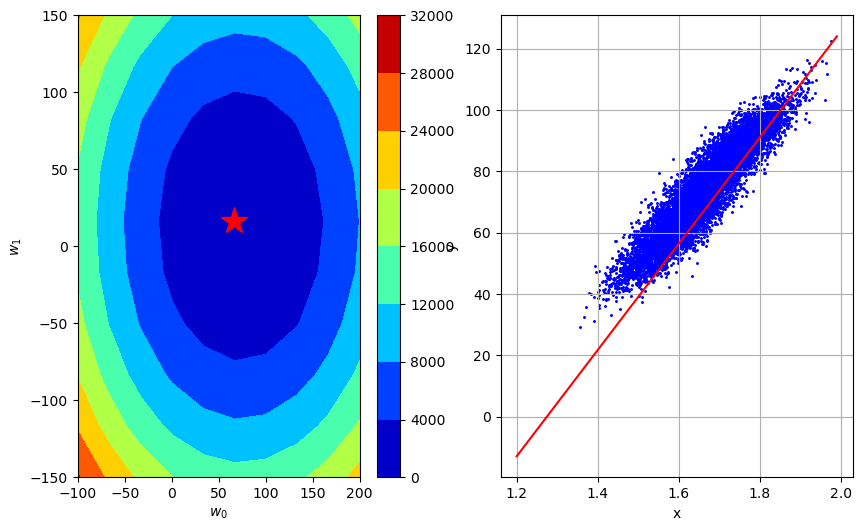

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) / len(e)
    return grad
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        print(w)
        print(gamma*gradient)
        w = w - gamma*gradient
        print(w.shape)
        #print(w.shape)

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

[0 0]
[-51.3057454  -9.4357987]
(2,)
GD iter. 0/49: loss=2792.2367127591674, w0=51.305745401473644, w1=9.435798704492269
[51.3057454  9.4357987]
[-15.39172362  -2.83073961]
(2,)
GD iter. 1/49: loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
[66.69746902 12.26653832]
[-4.61751709 -0.84922188]
(2,)
GD iter. 2/49: loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
[71.31498611 13.1157602 ]
[-1.38525513 -0.25476657]
(2,)
GD iter. 3/49: loss=17.410212120174467, w0=72.70024123388814, w1=13.370526764265632
[72.70024123 13.37052676]
[-0.41557654 -0.07642997]
(2,)
GD iter. 4/49: loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
[73.11581777 13.44695673]
[-0.12467296 -0.02292899]
(2,)
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
[73.24049073 13.46988572]
[-0.03740189 -0.0068787 ]
(2,)
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
[73.27789262 13.47676442]
[-0.011220

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [94]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) / len(e)
    return grad

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        gradients = np.zeros((batch_size,2))
        for y_batch, x_batch in batch_iter(y,tx,batch_size):
            for i in range(len(y_batch)):
                y_batch_array = np.array([y_batch[i]])
                x_batch_array = x_batch[i].reshape(1, -1)
                grad = compute_stoch_gradient(y_batch_array,x_batch_array,w)
                #print(grad)
                gradients[i] = grad
        
        g = np.sum(gradients, axis=0)
        
        print(g)
        g = g/batch_size
        
        w = w - gamma*grad
        ws.append(w)

        loss = compute_loss(y,tx,w)
        losses.append(loss)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [95]:
y_prueba = np.array([95.15172266])
x_prueba = np.array([[1.,1.02968239]])
print(x_prueba.shape)
w_prueba = np.array([0,0])
print(w_prueba.shape)
print(y_prueba.shape)
print(compute_stoch_gradient(y_prueba,x_prueba,w_prueba))


(1, 2)
(2,)
(1,)
[-95.15172266 -97.9760532 ]


In [115]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[-66.72246342   7.7030422 ]
SGD iter. 0/49: loss=2406.6928138373246, w0=6.672246342430175, w1=-0.7703042203044103
[-76.51786371 -12.44184036]
SGD iter. 1/49: loss=1906.3574641536645, w0=14.324032713146302, w1=0.4738798160216081
[-79.20092573 -38.97457719]
SGD iter. 2/49: loss=1430.9791621114105, w0=22.244125285904264, w1=4.371337535435531
[-49.12452602  -0.45109514]
SGD iter. 3/49: loss=1188.1643105140577, w0=27.156577888382262, w1=4.416447049934462
[-26.82375725  32.03671908]
SGD iter. 4/49: loss=1092.2634333470749, w0=29.838953613345815, w1=1.2127751415417896
[-61.3237539  -47.39073875]
SGD iter. 5/49: loss=804.5201819015823, w0=35.97132900348672, w1=5.951849016728944
[-37.66007239  23.15188396]
SGD iter. 6/49: loss=682.5882369822627, w0=39.73733624251128, w1=3.6366606205517025
[-50.99594171 -87.85990917]
SGD iter. 7/49: loss=494.11570391550976, w0=44.836930413946654, w1=12.422651537650964
[-34.30655806 -30.20873521]
SGD iter. 8/49: loss=408.47440679756005, w0=48.26758621994266, w1=1

In [116]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [109]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [110]:
y.shape, tx.shape

((202,), (202, 2))

In [123]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - tx.dot(w)
    loss = 1 / len(y) * np.sum(np.abs(e))
    return loss
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    

In [121]:
compute_loss(y,tx,w_initial)

74.06780585492638

In [117]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
#raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

[-59.46138322  29.32101013]
SGD iter. 0/49: loss=1090.268711431363, w0=41.622968255137145, w1=-20.52470709254042
[-33.72628852  -2.51310695]
SGD iter. 1/49: loss=549.0047549992911, w0=65.23137022138106, w1=-18.765532229735303
[-15.1672795  -0.8079244]
SGD iter. 2/49: loss=494.85521000032867, w0=75.84846586819678, w1=-18.199985152793094
[20.88270287 -6.48130495]
SGD iter. 3/49: loss=453.3227687215206, w0=61.230573857293784, w1=-13.663071687490394
[-0.34237042  0.21047544]
SGD iter. 4/49: loss=453.92459925509445, w0=61.47023314862266, w1=-13.810404492528866
[-4.77594425  1.74275489]
SGD iter. 5/49: loss=448.45084802181395, w0=64.81339412574958, w1=-15.030332917118717
[-20.69540325  -3.36508223]
SGD iter. 6/49: loss=360.6938118741528, w0=79.30017639909175, w1=-12.67477535591929
[ 30.74315055 -21.50630656]
SGD iter. 7/49: loss=236.03423705514612, w0=57.77997101248171, w1=2.379639234274281
[-6.32493719  1.35947004]
SGD iter. 8/49: loss=182.4111392688288, w0=62.20742704768871, w1=1.428010205

In [118]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [122]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    err = y - tx.dot(w)
    grad = -np.dot(tx.T, np.sign(err)) / len(err)
    return grad, err
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************

In [126]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        subgrad, err = compute_subgradient_mae(y, tx, w)
        w = w -gamma*subgrad
        ws.append(w)
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [127]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.36780585492637, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=72.66780585492637, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=71.96780585492638, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.26780585492638, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=70.56780585492639, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=69.86780585492637, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.16780585492639, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=68.46780585492637, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=67.76780585492638, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.06780585492639, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=66.36780585492637, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=65.66780585492639, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 1

In [128]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1001, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [129]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for y_batch, tx_batch in batch_iter(
            y, tx, batch_size=batch_size, num_batches=1
        ):
            # compute a stochastic subgradient and loss
            grad, err = compute_subgradient_mae(y_batch, tx_batch, w)
            # update w through the stochastic subgradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [130]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=73.36780585492637, w0=0.7, w1=-0.4110751845422259
SubSGD iter. 1/499: loss=72.66780585492637, w0=1.4, w1=0.11698063096842282
SubSGD iter. 2/499: loss=71.96780585492638, w0=2.0999999999999996, w1=0.7361140269130894
SubSGD iter. 3/499: loss=71.26780585492638, w0=2.8, w1=0.7014231675716183
SubSGD iter. 4/499: loss=70.56780585492638, w0=3.5, w1=0.581531354083287
SubSGD iter. 5/499: loss=69.86780585492637, w0=4.2, w1=1.460779319979459
SubSGD iter. 6/499: loss=69.16780585492639, w0=4.9, w1=1.900703762863641
SubSGD iter. 7/499: loss=68.46780585492637, w0=5.6000000000000005, w1=1.9379910744815108
SubSGD iter. 8/499: loss=67.76780585492638, w0=6.300000000000001, w1=1.2596440785069678
SubSGD iter. 9/499: loss=67.06780585492639, w0=7.000000000000001, w1=1.7688299224532202
SubSGD iter. 10/499: loss=66.36780585492637, w0=7.700000000000001, w1=2.293010473904938
SubSGD iter. 11/499: loss=65.66780585492637, w0=8.4, w1=2.8021963178511906
SubSGD iter. 12/499: loss=64.96780585492

In [131]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>